### Import modules

In [1]:
import numpy
import matplotlib.pyplot as plt
from omuse.community.dales.interface import Dales
from omuse.units import units

### Create Dales object

Using a single MPI task for the model

In [2]:
d=Dales(workdir='daleswork', channel_type='sockets', number_of_workers=1)

Setting kmax to 100


### Set parameters

Domain size and resolution

In [3]:
d.parameters_DOMAIN.itot = 32  # number of grid cells in x
d.parameters_DOMAIN.jtot = 32  # number of grid cells in y
d.parameters_DOMAIN.xsize = 6400 | units.m
d.parameters_DOMAIN.ysize = 6400 | units.m

Select advection schemes

In [4]:
d.parameters_DYNAMICS.iadv_mom = 6 # 6th order advection for momentum
d.parameters_DYNAMICS.iadv_thl = 5 # 5th order advection for scalars, less overshoots than 6th order

Turn off randomization of the initial state

In [5]:
d.parameters_RUN.krand = 0

Turn on adaptive time stepping and set more conservative time step limits

In [6]:
d.parameters_RUN.ladaptive = True
d.parameters_RUN.courant  = 0.5
d.parameters_RUN.peclet   = 0.1

Wind in the sponge layer dampened towards average wind (for symmetric evolution)

In [7]:
d.parameters_PHYSICS.lcoriol = False
d.parameters_PHYSICS.igrw_damp = 3

### Set up initial state of the system

Set all velocities to 0

In [8]:
d.fields[:,:,:].U = 0 | units.m / units.s
d.fields[:,:,:].V = 0 | units.m / units.s
d.fields[:,:,:].W = 0 | units.m / units.s

Set a low specific humidity -> no cloud formation

In [9]:
d.fields[:,:,:].QT = 0.001 | units.kg / units.kg

Create a bubble perturbation, given a DALES grid which is used for grid size and coordinates
if ```gaussian=True```, a gaussian perturbation is generated, with standard deviation r, otherwise a
constant perturbation is generated inside a sphere of radius r.

Create a perturbation: Gaussian bubble of warm air at (cx,cy,cz), radius r 

In [10]:
cx,cy,cz,r = 3200|units.m, 3200|units.m, 500|units.m, 500|units.m
d.fields[:,:,:].THL += (0.5 | units.K) * numpy.exp(
    -((d.fields.x-cx)**2 + (d.fields.y-cy)**2 + (d.fields.z-cz)**2)/(2*r**2))

### Evolve model

...and plot vertical cross sections of the thl field at regular intervals

Evolving to 0.0 min
Evolving to 4.0 min
Evolving to 8.0 min
Evolving to 12.0 min
Evolving to 16.0 min
Evolving to 20.0 min
Evolving to 24.0 min
Evolving to 28.0 min
Evolving to 32.0 min
Evolving to 36.0 min
Evolving to 40.0 min
Evolving to 44.0 min


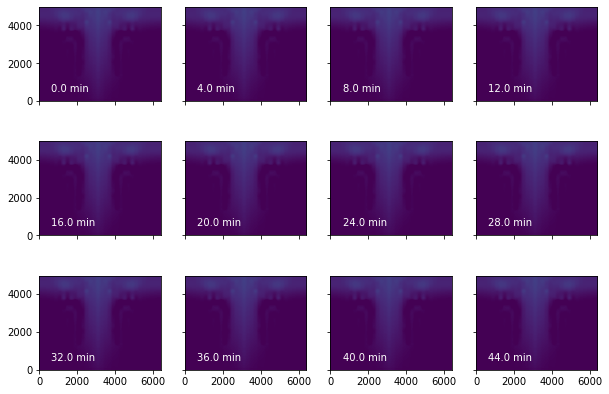

In [13]:
times = numpy.linspace(0, 44, 12) | units.minute # times for snapshots
fig, axes = plt.subplots(3, 4, sharex=True, sharey=True,figsize=(10,7))
extent = (0, d.fields.y[0,-1,0].value_in(units.m),
          0, d.fields.z[0,0,-1].value_in(units.m))

for t,ax in zip(times, axes.flatten()):
    print('Evolving to', t)
    d.evolve_model(t)
    im = ax.imshow(d.fields[16,:,:].THL.value_in(units.K).transpose(), 
              extent=extent, origin='bottom', vmin=292.5, vmax=292.75)
    ax.text(.1, .1, str(t.in_(units.minute)),
             color='w', transform=ax.transAxes)
